In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style(style="darkgrid")
# plt.rcParams['figure.figsize'] = [12.0, 8.0] # hace el tamaño de los gráficos, el doble del normal del cuaderno
plt.rcParams['figure.figsize'] = [9.0, 6.0] # hace que el tamaño de los gráficos sea el doble del normal del cuaderno

from IPython.display import display, HTML # usar display() para tener siempre una tabla html bien formateada

### Carga de datos y vista previa

In [3]:
titanic_df = pd.read_csv("titanic_org.csv", index_col=["PassengerId"])
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Sin embargo, desde arriba también podemos ver que tenemos valores perdidos en las columnas - Edad, Cabina, Embarcado.

- Los valores faltantes de Cabina y Embarcado no serán corregidos - porque ninguna pregunta se basa en estos factores
- Los valores que faltan de la edad se corregirán ahora, porque están implicados en varias preguntas y en el análisis que se hace a continuación.

### Fijar las edades que faltan
Para revisar los datos por distribuciones, y para abordar varias preguntas - primero tenemos que tratar este problema de las edades que faltan.

Si suponemos que las edades que faltan se distribuyen de forma similar a los valores presentes, podemos sustituir los valores que representan la distribución existente.

Para ello, podemos sustituir los valores que faltan por la media.

Para tener los mejores valores representativos poblados - tomaremos la media basada en el Sexo y la Clase P. En otras palabras, la media de las edades para el sexo dentro de la clase P, y al reemplazar la edad faltante, estos dos factores se mantendrán en consideración - para utilizar la media de las edades relacionadas.


In [5]:
mean_ages = titanic_df.groupby(['Sex','Pclass'])['Age'].mean()
display(mean_ages)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [6]:
def replace_nan_age(row):
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'], row['Pclass']]
    else:
        return row['Age']
    
titanic_df['Age'] = titanic_df.apply(replace_nan_age, axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Number of parents / children aboard')

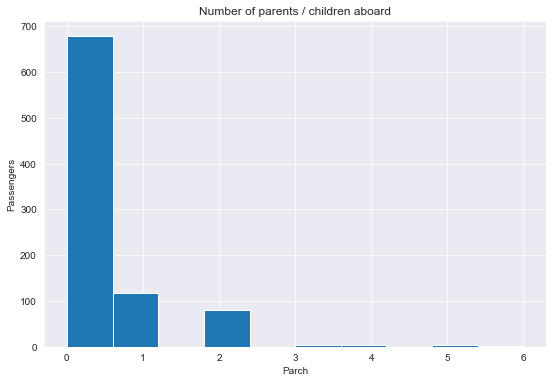

In [8]:
titanic_df.Parch.hist()
plt.xlabel('Parch')
plt.ylabel('Passengers')
plt.title('Number of parents / children aboard')

Text(0.5, 1.0, 'Number of Siblings / Spouses aboard')

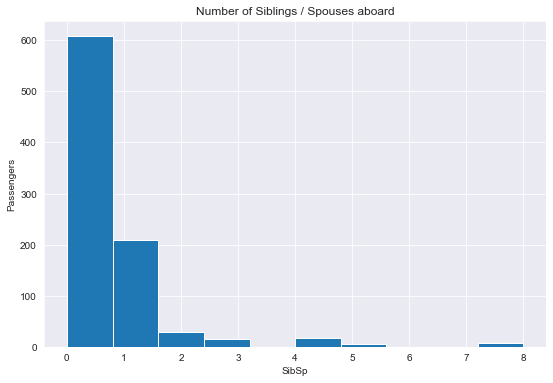

In [9]:
titanic_df.SibSp.hist()
plt.xlabel('SibSp')
plt.ylabel('Passengers')
plt.title('Number of Siblings / Spouses aboard')

#### De lo anterior se desprende que

El pasajero más viejo tenía 80 años
El pasajero más joven tenía unos 5 meses
La edad media de los pasajeros era de 29,32 años, pero hay que tener en cuenta que también faltan edades.
La media de supervivencia es de 0,3838
La tarifa máxima cobrada fue de 512,33 dólares
El número máximo de hermanos/cónyuges fue de 8
El número máximo de padres e hijos fue de 6

#### Preguntas en mente
1. ¿La clase de pasajero influyó en su supervivencia?
2. ¿Qué género tenía más posibilidades de sobrevivir?
3. ¿La persona que viajaba con otros tenía más posibilidades de sobrevivir?
4. ¿Qué grupo de edad tenía más posibilidades de sobrevivir?
5. ¿Cuál fue la supervivencia de hombres y mujeres por clase y por edad?


### Pregunta 1 - ¿La clase de pasajero influyó en su supervivencia?


In [10]:
## SUBSET DATAFRAME PARA LOS DATOS SOLICITADOS

survived_plass_df = titanic_df[['Survived', 'Pclass']]          # works - just have to say the columns required
survived_plass_df.head()

## AGRUPA LOS DATOS PARA CALCULAR LA SUPERVIVENCIA Y EL TOTAL 
## POR CLASE DE PASAJERO

## calcular la supervivencia por clase de pasajero
survived_by_pclass = survived_plass_df.groupby(['Pclass']).sum()
total_by_pclass = survived_plass_df.groupby(['Pclass']).count()

# el total se muestra como sobrevivido - así que cambia el nombre de la columna Total
total_by_pclass.rename(columns = {'Survived':'Total'}, inplace = True)

# fusionar los datos separados en un marco de datos
survived_total_by_pclass = pd.merge(survived_by_pclass, total_by_pclass, left_index=True, right_index=True) # merge by index
survived_total_by_pclass

,Survived,Total
Pclass,,
1,136,216
2,87,184
3,119,491


In [11]:
percent_survived = (survived_total_by_pclass['Survived'] / survived_total_by_pclass['Total']) * 100
survived_total_by_pclass['Percentage'] = percent_survived

survived_total_by_pclass

,Survived,Total,Percentage
Pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


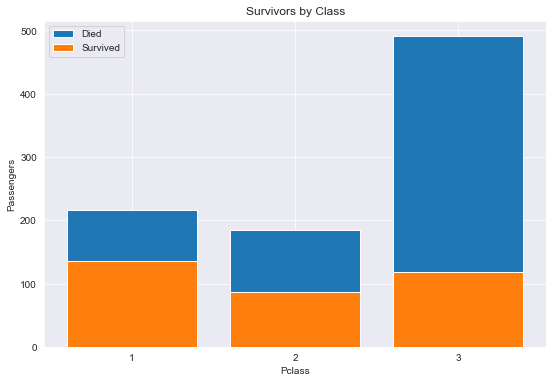

In [43]:
x = survived_total_by_pclass.index.values
ht = survived_total_by_pclass.Total
hs = survived_total_by_pclass.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, x)
plt.xlabel('Pclass')
plt.ylabel('Passengers')
plt.title('Survivors by Class')


plt.legend([pht,phs],['Died', 'Survived'])

### p1- Conclusión

Como se puede ver en la visualización y también en la tabla del marco de datos anterior, 
los pasajeros de primera clase tuvieron la mayor tasa de supervivencia, 
luego los de segunda clase y la menor tasa de supervivencia fue la de los pasajeros de tercera clase. 
Un gran número de pasajeros viajaba en 3ª clase (491), pero sólo el 24,24% sobrevivió.



### Pregunta 2 - ¿Qué género tuvo más supervivencia?


In [12]:
## CALCULAR LA SUPERVIVENCIA Y EL TOTAL POR SEXO

# groupby Sex
group_by_sex = titanic_df.groupby('Sex')

# calcular los supervivientes por sexo
survived_by_sex = group_by_sex['Survived'].sum()
survived_by_sex.name = 'Survived'
display(survived_by_sex)

# Calcular el total por sexo
total_by_sex = group_by_sex['Survived'].size()
total_by_sex.name = 'Total'
display(total_by_sex)

# concatenar los resultados separados en un marco de datos
survived_total_by_sex = pd.concat([survived_by_sex, total_by_sex], axis=1)
survived_total_by_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

Sex
female    314
male      577
Name: Total, dtype: int64

,Survived,Total
Sex,,
female,233,314
male,109,577


In [13]:
percent_survived = (survived_total_by_sex['Survived'] / survived_total_by_sex['Total']) * 100
survived_total_by_sex['Percentage'] = percent_survived

survived_total_by_sex

,Survived,Total,Percentage
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


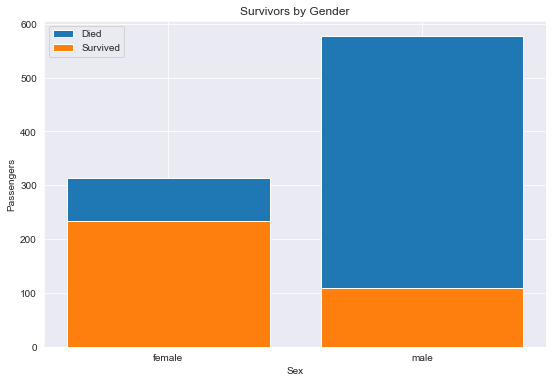

In [14]:
x = range(len(survived_total_by_sex.index.values))
ht = survived_total_by_sex.Total
hs = survived_total_by_sex.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, survived_total_by_sex.index.values)
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.title('Survivors by Gender')

plt.legend([pht,phs],['Died', 'Survived'])

### Conclusión p2

A partir de la visualización y el porcentaje de supervivencia de la impresión del marco de datos anterior, 
podemos ver que las mujeres tienen una tasa de supervivencia muy alta. 
La tasa de supervivencia de las mujeres fue del 74,3% y la de los hombres del 18,9%, 
por lo que la tasa de supervivencia de las mujeres fue aproximadamente 4 veces superior a la de los hombres.

Se puede concluir que las mujeres tuvieron preferencia en las operaciones de rescate, 
y los hombres debieron sacrificarse para que las hembras sobrevivieran.

### Pregunta 3 - ¿Las personas que viajaban con otras tenían más posibilidades de sobrevivir?
Veamos primero la distribución de los que iban solos y los que iban acompañados.


In [15]:
is_not_alone = (titanic_df.SibSp + titanic_df.Parch) >= 1
passengers_not_alone = titanic_df[is_not_alone]

is_alone = (titanic_df.SibSp + titanic_df.Parch) == 0
passengers_alone = titanic_df[is_alone]

print('Not alone - describe')
display(passengers_not_alone.describe())
print('Alone - describe')
display(passengers_alone.describe())


Not alone - describe


,Survived,Pclass,Age,SibSp,Parch,Fare
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.505650,2.169492,26.316614,1.316384,0.960452,48.832275
std,0.500676,0.864520,14.901225,1.420774,1.039512,55.307615
min,0.000000,1.000000,0.420000,0.000000,0.000000,6.495800
25%,0.000000,1.000000,17.000000,1.000000,0.000000,18.000000
50%,1.000000,2.000000,26.000000,1.000000,1.000000,27.750000
75%,1.000000,3.000000,36.000000,1.000000,2.000000,59.044800
max,1.000000,3.000000,70.000000,8.000000,6.000000,512.329200


Alone - describe


,Survived,Pclass,Age,SibSp,Parch,Fare
count,537.000000,537.000000,537.000000,537.0,537.0,537.000000
mean,0.303538,2.400372,31.297634,0.0,0.0,21.242689
std,0.460214,0.804511,11.694910,0.0,0.0,42.223510
min,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,0.000000,2.000000,23.000000,0.0,0.0,7.775000
50%,0.000000,3.000000,27.000000,0.0,0.0,8.137500
75%,1.000000,3.000000,36.000000,0.0,0.0,15.000000
max,1.000000,3.000000,80.000000,0.0,0.0,512.329200


Text(0.5, 1.0, "Alone & Not Alone Passenger's Ages")

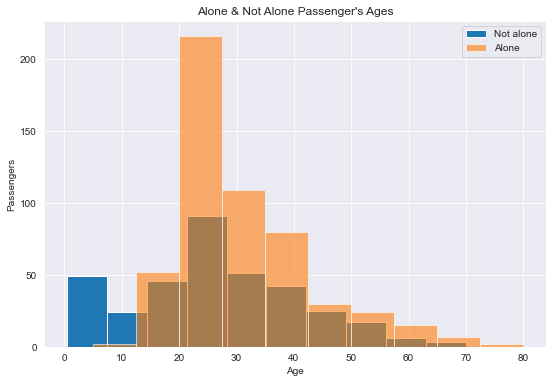

In [16]:
passengers_not_alone.Age.hist(label='Not alone')
passengers_alone.Age.hist(label='Alone', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend(loc='best')
plt.title('Alone & Not Alone Passenger\'s Ages')

De la distribución anterior podemos ver que

- Los que están en el rango de edad de 0 a 10 años, es decir, los niños, no estaban solos - lo que tiene sentido
- Sin embargo, hay un niño de 5 años que estaba solo.
- También había una persona de 80 años que iba sola
- 537 pasajeros iban solos, mientras que 354 iban acompañados
- Excepto en el grupo de edad de 0 a 10 años, en todos los demás grupos de edad, los que viajaban solos superaban a los que viajaban acompañados.

Ahora vamos a revisar estos por su supervivencia

In [17]:
notalone = np.where((titanic_df.SibSp + titanic_df.Parch) >= 1, 'Not Alone', 'Alone')
loneliness_summary = titanic_df.groupby(notalone, as_index=False)['Survived'].agg([np.sum, np.size])
loneliness_summary = loneliness_summary.rename(columns={'sum':'Survived', 'size':'Total'})

loneliness_summary


,Survived,Total
Alone,163,537
Not Alone,179,354


In [18]:
notalone = np.where((titanic_df.SibSp + titanic_df.Parch) >= 1, 'Not Alone', 'Alone')
loneliness_summary = titanic_df.groupby(notalone, as_index=False)['Survived'].agg([np.sum, np.size])
loneliness_summary = loneliness_summary.rename(columns={'sum':'Survived', 'size':'Total'})

loneliness_summary


,Survived,Total
Alone,163,537
Not Alone,179,354


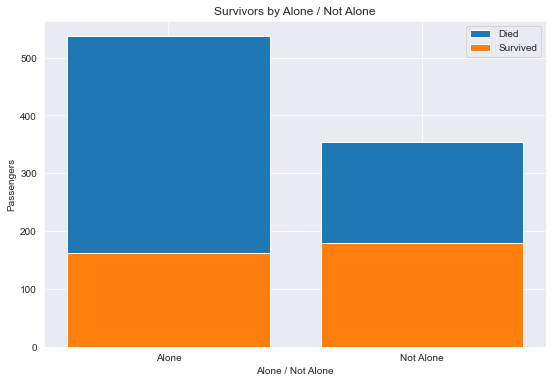

In [19]:
x = range(len(loneliness_summary.index.values))
ht = loneliness_summary.Total
hs = loneliness_summary.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, loneliness_summary.index.values)
plt.xlabel('Alone / Not Alone')
plt.ylabel('Passengers')
plt.title('Survivors by Alone / Not Alone')


plt.legend([pht,phs],['Died', 'Survived'])

### Conclusión p3

Los porcentajes y las visualizaciones anteriores indican claramente que las personas que viajaban acompañadas tenían una mayor tasa de supervivencia.



### Pregunta 4 - ¿Qué grupo de edad tiene más posibilidades de sobrevivir?

En primer lugar, revisemos la distribución por edades de los géneros


In [20]:
male_ages = (titanic_df[titanic_df.Sex == 'male'])['Age']
male_ages.describe()

count    577.000000
mean      30.423672
std       13.264336
min        0.420000
25%       23.000000
50%       27.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
female_ages = (titanic_df[titanic_df.Sex == 'female'])['Age']
female_ages.describe()

count    314.000000
mean      27.288063
std       13.091327
min        0.750000
25%       21.000000
50%       24.000000
75%       35.000000
max       63.000000
Name: Age, dtype: float64

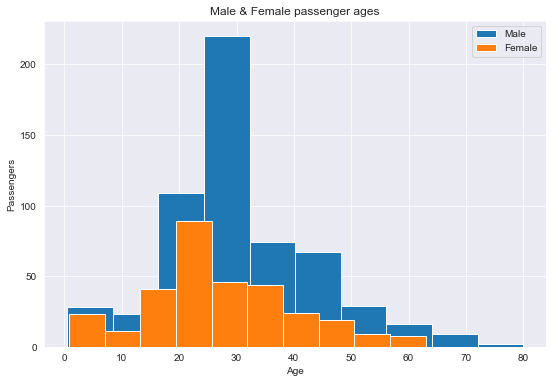

In [22]:
male_ages.hist(label='Male')
female_ages.hist(label='Female')

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Male & Female passenger ages')
plt.legend(loc='best')

De la distribución anterior, podemos ver que:

- En todos los grupos de edad, el número de mujeres era menor que el de hombres.
- La edad de la mujer de más edad era de 63 años, mientras que la edad del hombre de más edad era de 80 años.
Ahora vamos a hacer un análisis de supervivencia por grupos de edad


In [23]:
def age_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'
    
titanic_df['AgeGroup'] = titanic_df.Age.apply(age_group)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [24]:
age_group_summary = titanic_df.groupby(['AgeGroup'], as_index=False)['Survived'].agg([np.sum, np.size])
age_group_summary = age_group_summary.rename(columns={'sum':'Survived', 'size':'Total'})
age_group_summary

,Survived,Total
AgeGroup,,
0-9,38,62
10-19,41,102
20-29,113,358
30-39,84,185
40-49,39,110
50-59,20,48
60-69,6,19
70-79,0,6
80-89,1,1


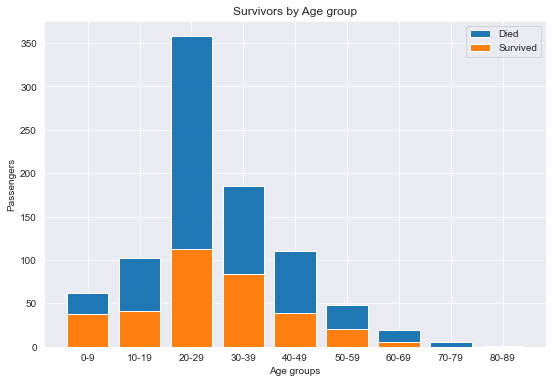

In [25]:
x = range(len(age_group_summary.index.values))
ht = age_group_summary.Total
hs = age_group_summary.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, age_group_summary.index.values)
plt.xlabel('Age groups')
plt.ylabel('Passengers')
plt.title('Survivors by Age group')


plt.legend([pht,phs],['Died', 'Survived'])

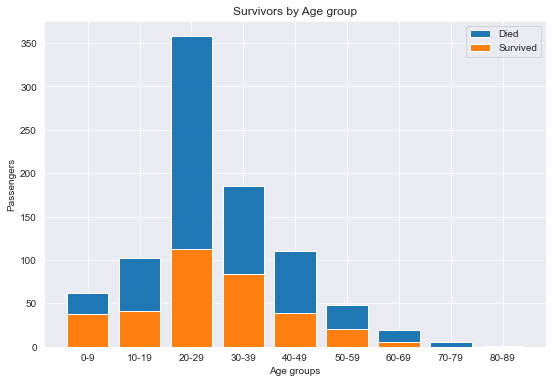

In [26]:
x = range(len(age_group_summary.index.values))
ht = age_group_summary.Total
hs = age_group_summary.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, age_group_summary.index.values)
plt.xlabel('Age groups')
plt.ylabel('Passengers')
plt.title('Survivors by Age group')


plt.legend([pht,phs],['Died', 'Survived'])

In [27]:
age_group_summary['SurvivedPercent'] = (age_group_summary.Survived / age_group_summary.Total) * 100
age_group_summary['DiedPercent'] = ((age_group_summary.Total - age_group_summary.Survived) / age_group_summary.Total) * 100
age_group_summary

,Survived,Total,SurvivedPercent,DiedPercent
AgeGroup,,,,
0-9,38,62,61.290323,38.709677
10-19,41,102,40.196078,59.803922
20-29,113,358,31.564246,68.435754
30-39,84,185,45.405405,54.594595
40-49,39,110,35.454545,64.545455
50-59,20,48,41.666667,58.333333
60-69,6,19,31.578947,68.421053
70-79,0,6,0.000000,100.000000
80-89,1,1,100.000000,0.000000


De la visualización y los porcentajes anteriores podemos ver que la mayoría de los supervivientes eran del grupo de edad de 20 a 29 años.

Pero, curiosamente, el porcentaje de supervivencia del grupo de 0 a 9 años es el mejor, con un 61,29%.

También hemos visto que las mujeres tienen una mejor tasa de supervivencia, por lo que estas tasas de supervivencia deben ser una mezcla de las tasas de supervivencia de hombres y mujeres, y por lo tanto, para tener una mejor visión, el aspecto del género también debe ser tomado en consideración.

In [29]:
sex_agegroup_summary = titanic_df.groupby(['Sex','AgeGroup'], as_index=False)['Survived'].mean()

sex_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.681034
3,female,30-39,0.855072
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.140496


In [30]:
male_agegroup_summary = sex_agegroup_summary[sex_agegroup_summary['Sex'] == 'male']

male_agegroup_summary

,Sex,AgeGroup,Survived
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.140496
10,male,30-39,0.215517
11,male,40-49,0.217949
12,male,50-59,0.133333
13,male,60-69,0.133333
14,male,70-79,0.000000
15,male,80-89,1.000000


In [31]:
female_agegroup_summary = sex_agegroup_summary[sex_agegroup_summary['Sex'] == 'female']

female_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.681034
3,female,30-39,0.855072
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000


In [33]:
age_group = titanic_df.AgeGroup.unique()
age_labels = sorted(age_group)
print(age_labels)

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']


Text(0.5, 1.0, 'Survivors by Gender by Age groups')

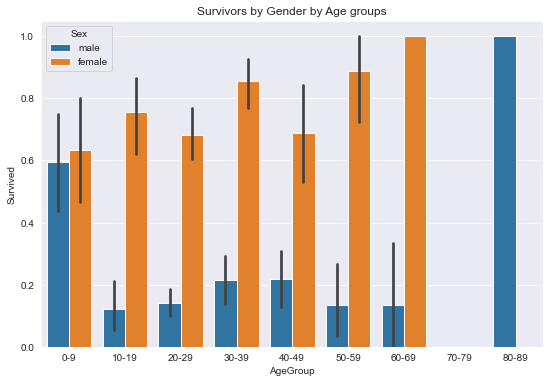

In [34]:
ax = sns.barplot(x='AgeGroup', y='Survived', data=titanic_df, hue='Sex', order=age_labels)
ax.set_title('Survivors by Gender by Age groups')

### Conclusión p4

De las proporciones anteriores y de la visualización, teniendo en cuenta el sexo y el grupo de edad, se desprende claramente que las mujeres y los niños tienen preferencia en operaciones de rescate por parte de los otros pasajeros masculinos. 
El grupo de edad de 0 a 9 años, tanto masculino como femenino, tuvo una tasa de supervivencia muy alta.



### Pregunta 5 - ¿Cuál fue la supervivencia masculina y femenina por clase y por edad?

Hombres y mujeres por clase
Revisemos los hombres y las mujeres, por clases de pasajeros



C:\Users\jluzuriaga\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jluzuriaga\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jluzuriaga\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Male and Female Passenger Ages by Class')

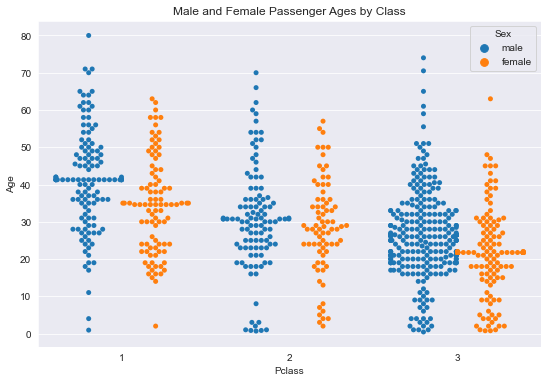

In [35]:
sns.swarmplot(x='Pclass', y='Age', data=titanic_df, hue='Sex', dodge=True).set_title('Male and Female Passenger Ages by Class')


Arriba podemos ver que, en comparación con la primera y la segunda clase, 
había un gran número de pasajeros en tercera clase. 
En particular, los hombres estaban en gran número ... 
por el aspecto del enjambre, estaban en gran número en la edad de 18 a 32 años.

Para entender la distribución de la edad de hombres y mujeres en las diferentes clases, 
el mejor gráfico es el de caja.

Text(0.5, 1.0, 'Comparison of Male and Female Passenger Ages by Class')

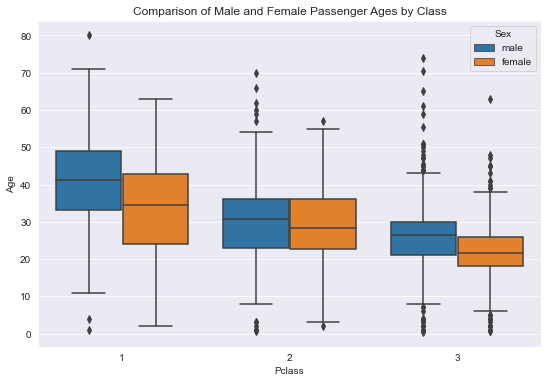

In [36]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df, hue='Sex').set_title('Comparison of Male and Female Passenger Ages by Class')


De lo anterior se desprende que la edad media de los hombres y mujeres de la 3ª clase era menor 
que la de los hombres y mujeres de la 2ª y 1ª clase. 
La edad media más alta de los hombres fue en la primera clase.

Pero este gráfico sólo da una idea de la distribución de las edades de los hombres y las mujeres por clase.

Ahora vamos a tratar de entender la supervivencia de hombres y mujeres, por clase

#### Supervivencia de hombres y mujeres por clase y por edad


In [37]:
def scatter(passengers, marker='o', legend_prefix=''):
    survived = passengers[passengers.Survived == 1]
    died = passengers[passengers.Survived == 0]

    x = survived.Age
    y = survived.Fare
    plt.scatter(x, y, c='blue', alpha=0.5, marker=marker, label=legend_prefix + ' Survived')

    x = died.Age
    y = died.Fare
    plt.scatter(x, y, c='red', alpha=0.5, marker=marker, label=legend_prefix + ' Died')

def scatter_by_class(pclass):
    class_passengers = titanic_df[titanic_df.Pclass == pclass]
    
    male_passengers = class_passengers[class_passengers.Sex == 'male']
    female_passengers = class_passengers[class_passengers.Sex == 'female']
    
    scatter(male_passengers, marker='o', legend_prefix='Male')
    scatter(female_passengers, marker='^', legend_prefix='Female')

    plt.legend(bbox_to_anchor=(0,1), loc='best') # bbox - to move legend out of plot/scatter
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('Gender survival by Age, for Pclass = ' + str(pclass))

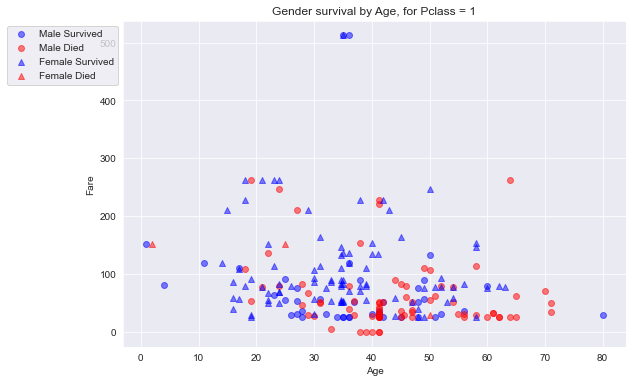

In [38]:
scatter_by_class(1)


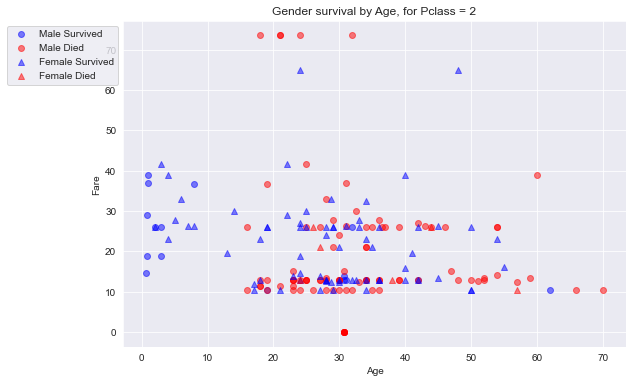

In [39]:
scatter_by_class(2)


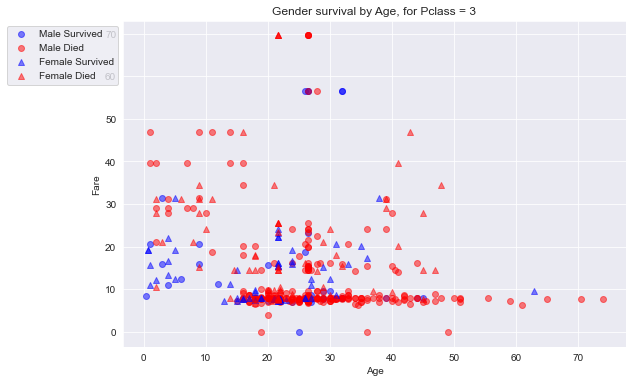

In [40]:
scatter_by_class(3)


Los tres gráficos de dispersión anteriores ofrecen una visión de la edad y la supervivencia 
de hombres y mujeres en cada una de las clases.

Pero para una mejor claridad y comprensión, 
podemos separar los gráficos de dispersión para hombres y mujeres, por clase. 
Esto es lo que haremos a continuación.

C:\Users\jluzuriaga\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jluzuriaga\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jluzuriaga\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


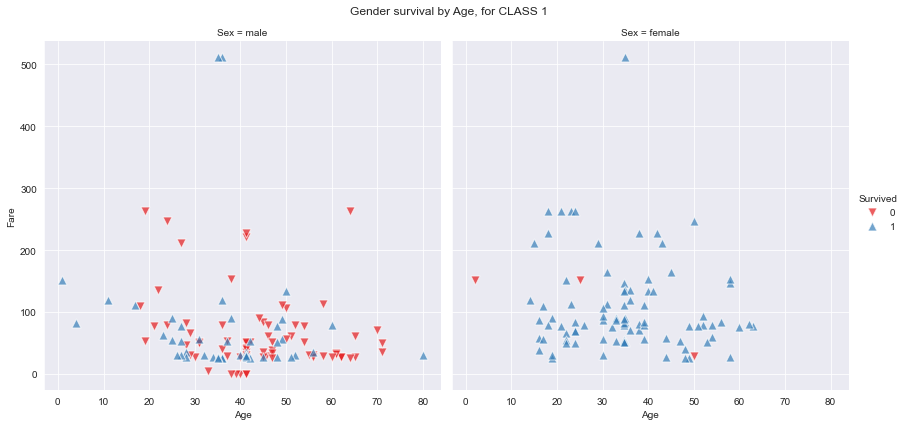

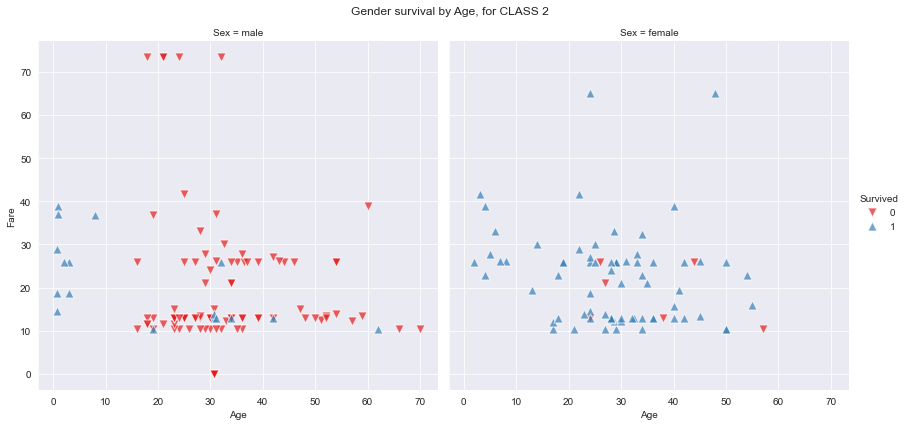

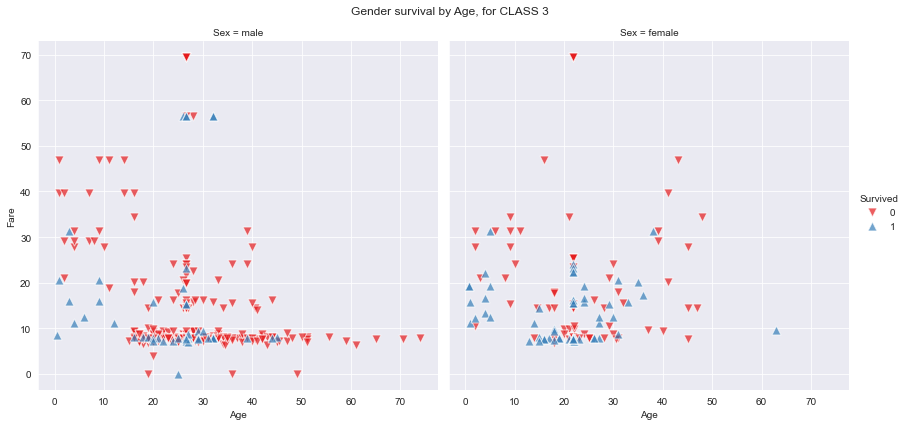

In [41]:
def sns_scatter_by_class(pclass):
    fg = sns.FacetGrid(titanic_df[titanic_df['Pclass'] == pclass], 
                      col='Sex',
                      col_order=['male', 'female'],
                      hue='Survived', 
                      hue_kws=dict(marker=['v', '^']), 
                      size=6,
                      palette='Set1')
    fg = (fg.map(plt.scatter, 'Age', 'Fare', edgecolor='w', alpha=0.7, s=80).add_legend())
    plt.subplots_adjust(top=0.9)
    fg.fig.suptitle('Gender survival by Age, for CLASS {}'.format(pclass))

# se trazan por separado porque los datos de los hombres y las mujeres en el mismo gráfico de dispersión 
# son difíciles de entender en forma comparativa
sns_scatter_by_class(1)
sns_scatter_by_class(2)
sns_scatter_by_class(3)

### Conclusión
De los gráficos de dispersión anteriores tenemos mucha claridad sobre la distribución de la edad de los hombres y las mujeres, y la supervivencia.

Podemos observar lo siguiente

- Las mujeres de primera y segunda clase se salvaron/supervivieron en su mayoría.
- En la primera y segunda clase, los niños de ambos sexos (grupo de edad 0-10) sobrevivieron casi todos.
- En la tercera clase, la tasa de supervivencia de las mujeres fue mayor que la de los hombres, 
pero la supervivencia de las hembras fue menor que la de las hembras de la primera y la segunda clase.

Podemos confirmar la observación anterior con el siguiente gráfico de barras, que muestra la tasa de supervivencia por clase y por sexo.


Text(0.5, 1.0, 'Gender Survival by Class')

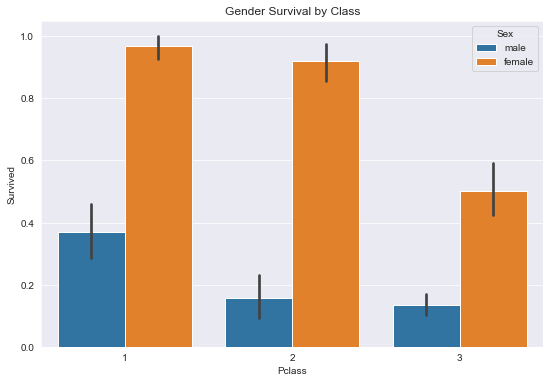

In [42]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df, hue='Sex').set_title('Gender Survival by Class')


## Conclusión general

### Resultados
- La tasa de supervivencia de las mujeres fue del 74,3% y la de los hombres del 18,9%, por lo que la tasa de supervivencia de las mujeres fue aproximadamente 4 veces superior a la de los hombres. Por lo tanto, las mujeres y los niños tuvieron preferencia en las operaciones de rescate, y debieron ser salvados por otros pasajeros masculinos.

- El 62,96% de los pasajeros de 1ª clase sobrevivieron, mientras que la tasa de supervivencia de los pasajeros de 3ª clase fue del 24,24%, lo que supone aproximadamente un tercio de los pasajeros de 1ª clase. Resulta sorprendente que los pasajeros de 1ª clase tengan una supervivencia elevada, es decir, que se les dio preferencia por su clase social.

- El 50% de los pasajeros que viajaban con familia sobrevivieron, mientras que el porcentaje de supervivencia fue del 30% para los que viajaban solos. Por lo tanto, la tasa de supervivencia fue alta para los pasajeros que viajaban con la familia, en comparación con los que viajaban solos.

- La tasa de supervivencia de los niños es mayor que la de los adultos.

### Limitaciones
- Limitaciones en el análisis
-- Para llegar a las conclusiones sólo se han utilizado la visualización, las proporciones y los porcentajes. Sin embargo, se podría mejorar el análisis utilizando pruebas estadísticas.

- Limitaciones de los datos
-- El conjunto de datos tiene algunas limitaciones: faltan datos para ciertas características/propiedades de los pasajeros, 
como la edad.
-- Además, estos datos son sólo una muestra de la población/datos completos del Titanic.
-- Los datos que faltan y el tamaño de la muestra podrían distorsionar los resultados, 
por ejemplo, debido a la falta de edad.
Además, no sabemos si la muestra fue seleccionada al azar.


### Planes futuros
Trabajo futuro o áreas potenciales a explorar

- Sólo se utilizaron tres parámetros en el análisis (edad, sexo y clase de pasajero), 
aunque es posible realizar más análisis.

- Otras preguntas que se pueden hacer son
¿Tiene una persona con una tarifa más alta mayores posibilidades de sobrevivir?
¿La cubierta del camarote aumentó/afectó a la tasa de supervivencia?
¿Tiene la supervivencia alguna relación con el título de una persona (como Sr., Sra., Srta., etc.)?


Fuente:
    
    https://github.com/vikramsjn/Investigate-Titanic-Dataset/